In [1]:
# Install the environnement
%pip install git+https://github.com/AwePhD/NotebooksLabsessionImage.git

  Cloning https://github.com/AwePhD/NotebooksLabsessionImage.git to /tmp/pip-req-build-wko581wo
  Running command git clone -q https://github.com/AwePhD/NotebooksLabsessionImage.git /tmp/pip-req-build-wko581wo
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for NLI: filename=NLI-1.0.0-py3-none-any.whl size=2406 sha256=74aa5692ff28a7ace01deb5f6b2999d40864cd7ab8900ccf3958945ce986ccb2
  Stored in directory: /tmp/pip-ephem-wheel-cache-7y8z23vr/wheels/17/4a/a4/4f920391e876c3c2632ecc7851748e1c11539349fe2eefd2c4
Successfully built NLI


In [2]:
# Import dataset 
# Can be found at https://www.kaggle.com/vishalsubbiah/pokemon-images-and-types
!rm -rf ./*
!curl -LO https://github.com/AwePhD/NotebooksLabsessionImage/raw/main/pokemon_dataset.zip
!unzip -qq pokemon_dataset.zip
!rm pokemon_dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   156  100   156    0     0   1695      0 --:--:-- --:--:-- --:--:--  1695
100 2484k  100 2484k    0     0  10.6M      0 --:--:-- --:--:-- --:--:-- 10.6M


In [3]:
# Standard imports
from pathlib import Path
from typing import Dict, List

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import io
from skimage import img_as_float

# Local package
from NLI.utils import mean_image

## Dataframe

Pandas work with two main special variables - _object_ - which are [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) and [Dataframes](https://pandas.pydata.org/docs/reference/frame.html).

The point of pandas is to visualize easily and process basic operations on data.

---

### Series

Serias have a column - array - of element with an index that should be a [hashable](https://www.geeksforgeeks.org/why-and-how-are-python-functions-hashable/#:~:text=So%2C%20hashable%20is%20a%20feature,change%20during%20its%20entire%20lifetime.) object. Each row - element - is indexed by an index. The only column does not have any title.

Example:

| Index |  |
|-------|-------|
| 0 | "apple" |
| 1 | "banana" |

---

### Dataframe

Dataframe are 2D tables. Each row have an index and can have multiple labelled columns. This object is made to process with `.csv`.

Note: Pandas processes data with numpy as backend, so it's  efficient.

Note 2: [Seaborn](https://seaborn.pydata.org/) might be another pretty data visualisation tool. This is compatible with Dataframe so Pandas and Seaborn can work in pair.

| Index (str) | Fruit 1 | Fruit 2 |
|-------|-------|---------|
| Mickael | apple | pear |
| Sonia | banana | pitaya |

---

In [4]:
# Import the database (db) from .csv with Pandas' DataFrame
# We specify that we can set the name of the pokemon as index
# The role of index is to identify the pokemon by an unique way. The name
# of Pokemon are well designed for this role.
db: pd.DataFrame = pd.read_csv(Path.cwd() / "pokemon.csv", index_col="Name")
db.head()

,Type1,Type2
Name,,
bulbasaur,Grass,Poison
ivysaur,Grass,Poison
venusaur,Grass,Poison
charmander,Fire,NaN
charmeleon,Fire,NaN


In [6]:
# Import data
path_images_dir: Path = Path.cwd() / "images"

# Get the RGB mean of the picture PNG pictures
dict_mean: Dict[str, np.ndarray] = {
  filename.stem: mean_image(
    img_as_float(io.imread(filename))
  )
  for filename in path_images_dir.iterdir()
  if filename.suffix == ".png"
}

# Function that make a new RGB column based on dict_mean
def mapping(row, list_mean, i):
  return (
    dict_mean[row.name][i] 
    if row.name in dict_mean.keys()
    else np.NAN
  )

# Make new column
col_list: List[str] = ["Red", "Green", "Blue"]
for i,col in enumerate(col_list):
  # Apply methods is a way to generate series from dataframe and other row
  # The function used as argument for apply must have only one argument: the row
  # that's why the lambda take only one argument but mapping can take more.
  # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
  db[col] = db.apply( lambda row: mapping(row,dict_mean, i), axis=1)

db.head()

,Type1,Type2,Red,Green,Blue
Name,,,,,
bulbasaur,Grass,Poison,0.544665,0.759502,0.629522
ivysaur,Grass,Poison,0.556356,0.602366,0.630614
venusaur,Grass,Poison,0.558999,0.691057,0.665540
charmander,Fire,NaN,0.854908,0.693344,0.478425
charmeleon,Fire,NaN,0.882350,0.580476,0.455418


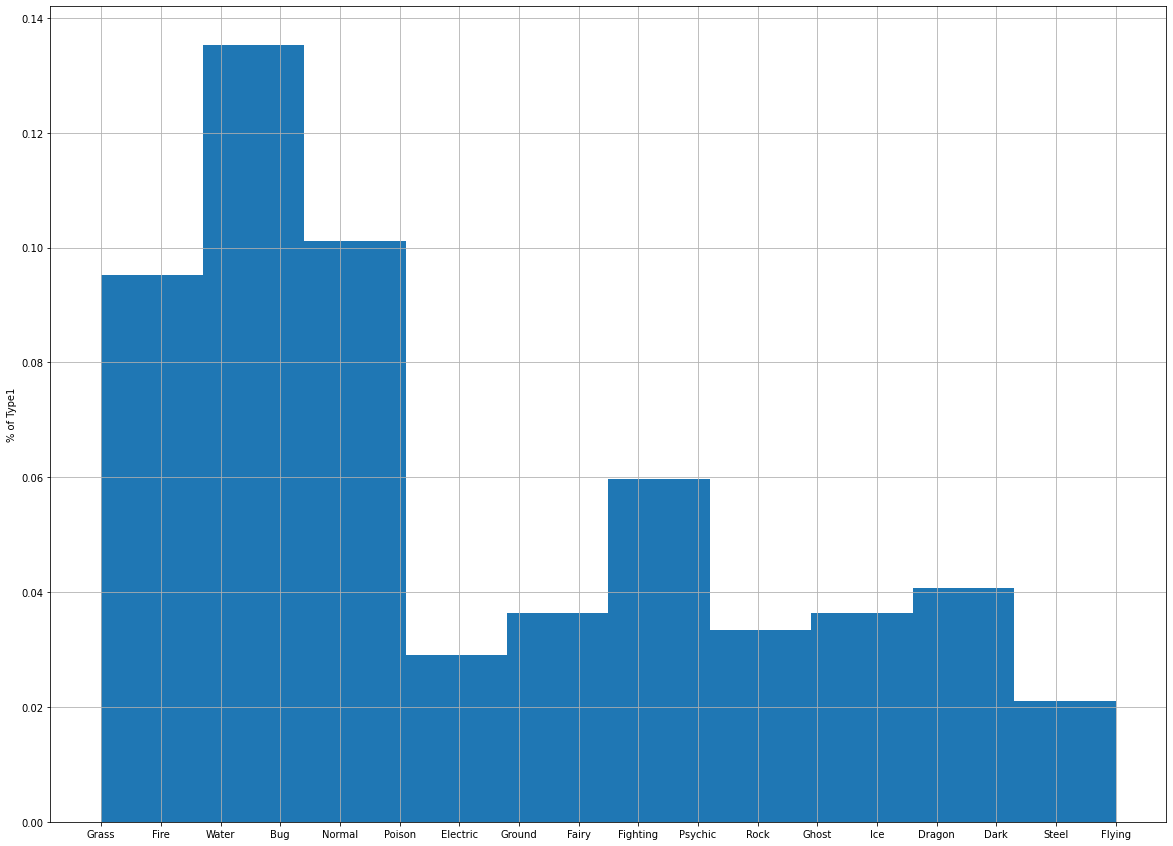

<Figure size 432x288 with 0 Axes>

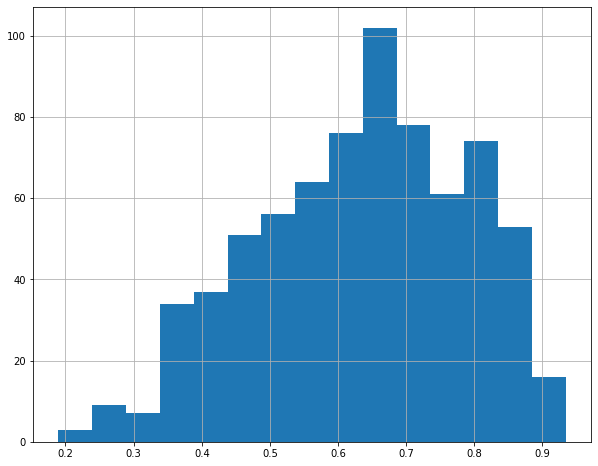

In [21]:
# Let's visualize some column
fig= plt.figure(figsize = (20,15))
ax = fig.gca()
db["Type1"].hist(ax = ax, density=1)
ax.set_ylabel("% of Type1") 
plt.figure()
fig= plt.figure(figsize = (10,8))
ax = fig.gca()
db["Red"].hist(ax = ax, bins="auto")
plt.show()

In [8]:
# We can sort pokemon by indexes for example
print(db.sort_index())

# We can all sort by a values
print(db.sort_values("Type1"))

                   Type1   Type2       Red     Green      Blue
Name                                                          
abomasnow          Grass     Ice  0.757895  0.822524  0.817889
abra             Psychic     NaN  0.805204  0.761586  0.239281
absol               Dark     NaN  0.755053  0.765394  0.816313
accelgor             Bug     NaN  0.594447  0.476965  0.543438
aegislash-blade    Steel   Ghost  0.631556  0.580437  0.475241
...                  ...     ...       ...       ...       ...
zoroark             Dark     NaN  0.378221  0.215354  0.269813
zorua               Dark     NaN  0.372739  0.293972  0.386525
zubat             Poison  Flying  0.440474  0.367767  0.523906
zweilous            Dark  Dragon  0.360254  0.365755  0.400055
zygarde-50        Dragon  Ground  0.386607  0.434725  0.245167

[809 rows x 5 columns]
            Type1   Type2       Red     Green      Blue
Name                                                   
durant        Bug   Steel  0.507184  0.491327

In [9]:
# Now we will try to get Pikachu and compare his squared L2 distance - euclidean
# - of its RGB column to other pokemon in the database.
# Plus the squared L2 distance of each column is average for each line. It gives
# a series

# Pikachu row
pikachu_row = db.loc["pikachu"]
rgb_pikachu_row = pikachu_row[col_list]
print(
    f"pikachu: \n{pikachu_row}\n\n"
    f"RGB pikachu cols only: \n{rgb_pikachu_row}\n"
)
# RGB db only
db_rgb_without_jpg = db[col_list].dropna()
print(
    f"Only computed RGB rows: \n{db_rgb_without_jpg}\n"
)
# Difference
diff_dataframe = rgb_pikachu_row - db_rgb_without_jpg
print(
    f"Difference RGB between pikachu and the rest: \n{diff_dataframe}\n"
)
# Compute squared L2
l2_diff_dataframe = diff_dataframe.pow(2)
print(
    f"Squared L2 (squared difference): \n{l2_diff_dataframe}\n"
)
# Mean square L2 by row
# 1 is about the axis : axis 1 is axis of column, we want a mean along the 
# different value of RGB channels.
average_L2_diff_series = l2_diff_dataframe.mean(1)
print(
    f"Mean square L2 by row: \n{average_L2_diff_series}\n"
)

pikachu: 
Type1    Electric
Type2         NaN
Red       0.88826
Green    0.816296
Blue     0.419125
Name: pikachu, dtype: object

RGB pikachu cols only: 
Red       0.88826
Green    0.816296
Blue     0.419125
Name: pikachu, dtype: object

Only computed RGB rows: 
                     Red     Green      Blue
Name                                        
bulbasaur       0.544665  0.759502  0.629522
ivysaur         0.556356  0.602366  0.630614
venusaur        0.558999  0.691057  0.665540
charmander      0.854908  0.693344  0.478425
charmeleon      0.882350  0.580476  0.455418
...                  ...       ...       ...
yveltal         0.359542  0.215458  0.244978
zygarde-50      0.386607  0.434725  0.245167
diancie         0.680049  0.572781  0.666352
hoopa-confined  0.764505  0.602667  0.550739
volcanion       0.689975  0.383400  0.346466

[721 rows x 3 columns]

Difference RGB between pikachu and the rest: 
                       Red      Green       Blue
Name                            

In [10]:
# The same operation can be done in one line operation
# That's why pandas is a powerful library that is worth it to learn
# knowing that the syntax is pretty intuitive.
series_distance = (
     db[col_list].dropna() - db.loc["pikachu"][col_list]
).pow(2).mean(1)
print(series_distance)

Name
bulbasaur         0.055184
ivysaur           0.066885
venusaur          0.061606
charmander        0.006582
charmeleon        0.018988
                    ...   
yveltal           0.223626
zygarde-50        0.142505
diancie           0.054591
hoopa-confined    0.026092
volcanion         0.077332
Length: 721, dtype: float64
